In [3805]:
import pandas as pd
import numpy as np


In [3806]:
df = pd.read_csv('./PlanePrice.csv')
df = df . dropna( )
df

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,500 U,Propjet,1200,270,265.0,64.0,402,"1,680",2300.0,1830.0,"9,920","5,732",47/3,53/3,"2,261",3000000.0
513,100 Darter (S.L. Industries),Propjet,720,312,288.0,89.0,578,"2,380",2280.0,3043.0,"11,200","6,837",43/5,47/8,"1,722",3584000.0
514,520,Propjet,720,290,275.0,87.0,390,"2,236",3230.0,3017.0,"11,200","6,389",43/5,47/8,"1,515",3200000.0
515,2180,Propjet,620,275,270.0,77.0,382,"1,750",2940.0,2446.0,"9,474","5,164",36/8,42/8,"1,336",3240000.0


In [3807]:
df.shape

(421, 16)

In [3808]:
#  تا این جا 421 تا داده دازیم با 16 تا ستون

#  محسوب میشود lable  است که  price  ستون اخر 

# هستند feature  ستون های دیگر 


In [3809]:
df['Price'] .value_counts()

Price
4500000.0    25
2000000.0    18
2500000.0    16
1600000.0     9
1700000.0     9
             ..
1360000.0     1
3584000.0     1
3200000.0     1
3240000.0     1
3160000.0     1
Name: count, Length: 168, dtype: int64

In [3810]:
# مثلا از کلاس 4500000 ، 25 تا نمونه داریم

#  کلا 168 تا کلاس از نمونه های مختلف داریم

In [3811]:
x = df . drop( 'Price' , axis = 1)
y = df['Price']

#  x  =>>>  features
#  y  =>>>  lable


lableEncoder  چون داده های کتگوری داریم باید قبل از نرمالایز کردن استفاده کنیم از


In [3812]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('PlanePrice.csv')
df = df .dropna( )

encoder = LabelEncoder( )

for column in df . select_dtypes(include = ['object']) :
    df[column] = encoder . fit_transform(df[column])


# normalize

In [3813]:
from sklearn.preprocessing import  StandardScaler


x = df . drop( 'Price' , axis = 1)

y = df['Price']

scaler = StandardScaler( )
x = scaler . fit_transform(x)
x

array([[-0.82856759,  0.04208079, -1.28857148, ..., -0.78218437,
         0.14409733, -0.3575282 ],
       [ 0.3071978 ,  0.04208079,  2.10198222, ..., -1.62183281,
        -0.28642831, -0.92751935],
       [-0.82856759,  0.04208079,  2.20170439, ..., -1.46439873,
        -0.63867655, -0.718986  ],
       ...,
       [ 0.09340667,  2.25658243,  1.80281572, ...,  1.4743708 ,
         1.7487838 , -1.23336827],
       [-0.17383225,  2.25658243,  1.40392705, ...,  1.13326362,
         0.96600991, -1.3723905 ],
       [-0.18719419,  2.25658243,  1.40392705, ...,  0.84463447,
         0.96600991, -1.3167816 ]])

In [3814]:
# بلاخره نرمالایز شد  x  
#  :)

# test_train

In [3815]:
from sklearn.model_selection import train_test_split

x_train , x_test  , y_train , y_test = train_test_split(x , y , test_size = 0.2)

# بیست درصد داده ها را به عنوان تست در نظر میگیرم 
# هشتاد درصد داده ها را هم به عنوان ترین در نظر گرفتیم 

In [3816]:
x_test.shape , y_test.shape

((85, 15), (85,))

In [3817]:
x_train.shape , y_train.shape

((336, 15), (336,))

# KNN

In [3818]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [3819]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [3820]:
from sklearn.metrics import accuracy_score , f1_score

a_train = accuracy_score(y_train , y_pred_train)
a_test = accuracy_score(y_test , y_pred_test)
a_train , a_test

(0.35714285714285715, 0.11764705882352941)

In [3821]:
f1_train = f1_score(y_train , y_pred_train , average = 'weighted')
f1_test = f1_score(y_test , y_pred_test , average = 'weighted')
f1_train , f1_test

(np.float64(0.28001521092326564), np.float64(0.0938375350140056))

# RANDOM FOREST

In [3822]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators = 11 )
rf.fit(x_train , y_train)

RandomForestClassifier(n_estimators=11)

In [3823]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [3824]:
# محاسبه معیار های ارزش یابی 
# accuracy

a_train = accuracy_score(y_train , y_pred_train)
a_test = accuracy_score(y_test , y_pred_test)
a_train , a_test



(0.9851190476190477, 0.21176470588235294)

In [3825]:
# محاسبه معیار های ارزش یابی 
# f1_score

f1_train = f1_score(y_train , y_pred_train , average = 'weighted')
f1_test = f1_score(y_test , y_pred_test , average = 'weighted')
f1_train , f1_test

(np.float64(0.9813928135356708), np.float64(0.1891316526610644))

# SVM

In [3826]:
from sklearn import svm

model = svm .SVC(kernel = 'linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [3827]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [3828]:
# محاسبه معیار های ارزش یابی 
# accuracy


a_train = accuracy_score(y_train , y_pred_train)
a_test = accuracy_score(y_test , y_pred_test)
a_train , a_test

(0.6190476190476191, 0.09411764705882353)

In [3829]:
# محاسبه معیار های ارزش یابی 
# f1_score

f1_train = f1_score(y_train , y_pred_train , average = 'micro')
f1_test = f1_score(y_test , y_pred_test , average = 'micro')
f1_train , f1_test

(np.float64(0.6190476190476191), np.float64(0.09411764705882353))

# LINER REGRESSION

In [3830]:
from sklearn.linear_model import LinearRegression

l_r =LinearRegression()
l_r.fit(x_train , y_train )


LinearRegression()

In [3831]:
y_pred_train = l_r.predict(x_train)
y_pred_test = l_r.predict(x_test)

In [3832]:
from sklearn.metrics import  r2_score , mean_squared_error


r2_train = r2_score(y_train , y_pred_train)
r2_test = r2_score(y_test , y_pred_test)

r2_train , r2_test

(0.9208927857129007, 0.9090660222799689)

In [3833]:
mse_train = mean_squared_error(y_train , y_pred_train )
mse_test = mean_squared_error(y_test , y_pred_test)
mse_train , mse_test


(np.float64(73420747852.36142), np.float64(72611257801.65904))

# PCA

In [3834]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

pca = PCA (n_components = 6)
pca . fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

x_train.shape , x_test_pca.shape

((336, 15), (85, 6))

In [3835]:
model = MLPClassifier(hidden_layer_sizes = 180 , max_iter = 200)
model.fit(x_train_pca , y_train)

y_pred_train = model.predict(x_train_pca)
y_pred_test = model.predict(x_test_pca)

C:\Users\Asus TUF\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3836]:
from sklearn.metrics import accuracy_score ,f1_score

a_train = accuracy_score(y_train , y_pred_train)
a_test = accuracy_score(y_test , y_pred_test)
a_train , a_test

(0.6071428571428571, 0.11764705882352941)

In [3837]:
f1_train = f1_score(y_train , y_pred_train , average = 'micro')
f1_test = f1_score(y_test , y_pred_test , average = 'micro') 
f1_train , f1_test

(np.float64(0.6071428571428571), np.float64(0.11764705882352941))

# CO TRAINING 

In [3838]:
x = df . drop( 'Price' , axis = 1)
y = df['Price']

x1 = df.drop(['Model Name', 'Engine Type', 'Price'], axis=1)
x2 = df[['Model Name', 'Engine Type']]

In [3839]:
from sklearn.model_selection import train_test_split

x1_train , x1_test , y_tain , y_test = train_test_split(x1 , y , test_size = 0.2)
x2_train , x2_test , y_tain , y_test = train_test_split(x2 , y , test_size = 0.2)

In [3840]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

model1 = DecisionTreeClassifier()
model2 = svm.SVC(kernel='rbf')

# آموزش مدلها
model1.fit(x1_train, y_train)
model2.fit(x2_train, y_train)

# پیشبینی با استفاده از دادههای آموزشی
y_pred1_train = model1.predict(x1_train)
y_pred2_train = model2.predict(x2_train)


from sklearn.metrics import accuracy_score
a_model1_train = accuracy_score(y_train, y_pred1_train)
a_model2_train = accuracy_score(y_train, y_pred2_train)

print(a_model1_train, a_model2_train)

1.0 0.06845238095238096


# chart

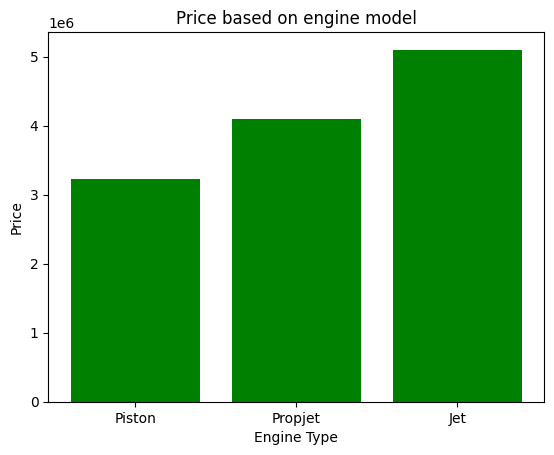

In [3841]:
import matplotlib.pyplot as plt 

df1 = pd.read_csv('PlanePrice.csv')

# فیلتر کردن دادهها
filter_df1 = df1[df1['Price'] > 3000000]

# استخراج دادههای فیلتر شده
x = filter_df1['Engine Type']
y = filter_df1['Price']

plt.bar(x, y, color='green')
plt.title('Price based on engine model')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.show()

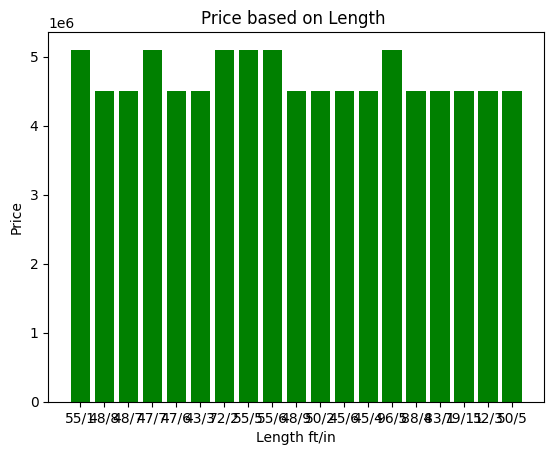

In [3861]:
filter_df1 = df1[df1['Price'] > 4300000]
x = filter_df1['Length ft/in']
y = filter_df1['Price']

plt.bar(x, y, color='green')
plt.title('Price based on Length ')
plt.xlabel('Length ft/in')
plt.ylabel('Price')
plt.show()


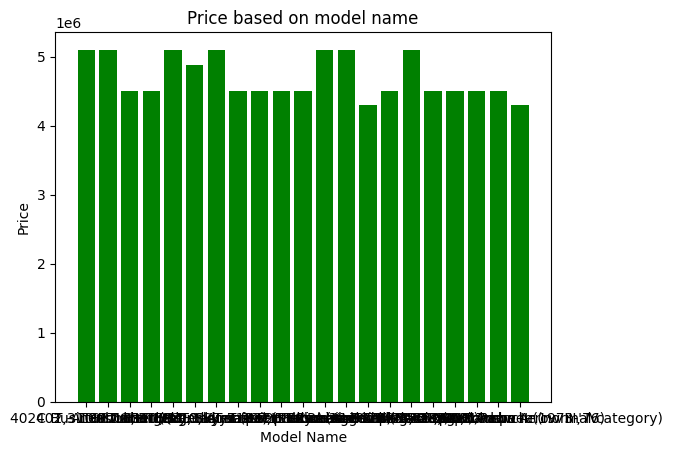

In [3844]:
filter_df1 = df1[df1['Price'] > 4200000]
x = filter_df1['Model Name']
y = filter_df1['Price']

plt.bar(x, y, color='green')
plt.title('Price based on model name')
plt.xlabel('Model Name')
plt.ylabel('Price')
plt.show()

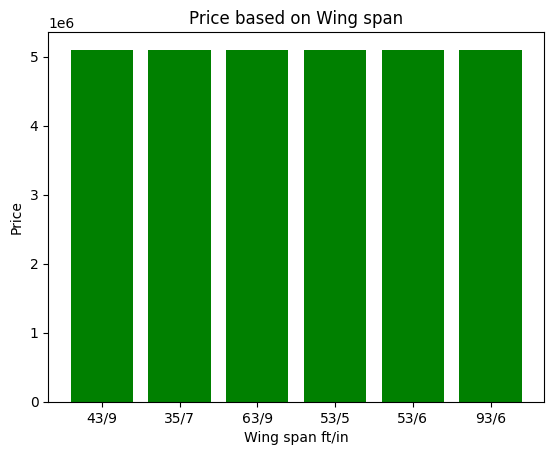

In [3845]:
filter_df1 = df1[df1['Price'] > 4500000 ]

x = filter_df1['Wing span ft/in']
y = filter_df1['Price']

plt.bar(x, y, color='green')
plt.title('Price based on Wing span')
plt.xlabel('Wing span ft/in')
plt.ylabel('Price')
plt.show()

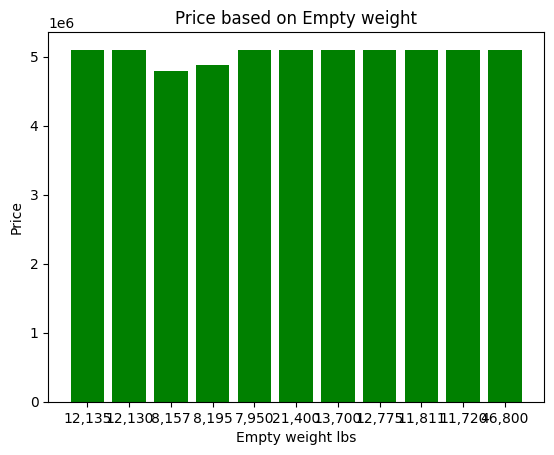

In [3846]:

filter_df1 = df1[df1['Price'] > 4500000 ]

x = filter_df1['Empty weight lbs']
y = filter_df1['Price']

plt.bar(x, y, color='green')
plt.title('Price based on Empty weight')
plt.xlabel('Empty weight lbs')
plt.ylabel('Price')
plt.show()